In [25]:
import numpy as np 
NEW_FILE3 = 'D:/datasets/solar/new_data/rainy.csv'
data = np.loadtxt(NEW_FILE3,delimiter=',',skiprows=1)
for i in range(len(data)):
#     if data[i][1] == 1:data[i][1] = 17.938
#     elif data[i][1] == 2:data[i][1] = 17.938
#     elif data[i][1] == 3:data[i][1] = 16.067
#     elif data[i][1] == 4:data[i][1] = 16.067
#     elif data[i][1] == 5:data[i][1] = 16.067
#     elif data[i][1] == 6:data[i][1] = 15.137
#     elif data[i][1] == 7:data[i][1] = 15.137
#     elif data[i][1] == 8:data[i][1] = 15.137
#     elif data[i][1] == 9:data[i][1] = 17.714
#     elif data[i][1] == 10:data[i][1] = 17.714
#     elif data[i][1] == 11:data[i][1] = 17.714
#     elif data[i][1] == 12:data[i][1] = 17.938
    
    if data[i][2] == 8.0:data[i][2] = 5.1096
    elif data[i][2] == 8.5:data[i][2] = 8.9351
    elif data[i][2] == 9.0:data[i][2] = 12.5525
    elif data[i][2] == 9.5:data[i][2] = 15.4875
    elif data[i][2] == 10.0:data[i][2] = 18.1367
    elif data[i][2] == 10.5:data[i][2] = 20.2583
    elif data[i][2] == 11.0:data[i][2] = 21.9231
    elif data[i][2] == 11.5:data[i][2] = 23.1655
    elif data[i][2] == 12.0:data[i][2] = 23.9481
    elif data[i][2] == 12.5:data[i][2] = 24.0809
    elif data[i][2] == 13.0:data[i][2] = 24.1543
    elif data[i][2] == 13.5:data[i][2] = 23.6692
    elif data[i][2] == 14.0:data[i][2] = 22.6423
    elif data[i][2] == 14.5:data[i][2] = 21.1091
    elif data[i][2] == 15.0:data[i][2] = 19.6702
    elif data[i][2] == 15.5:data[i][2] = 17.5288
    elif data[i][2] == 16.0:data[i][2] = 15.1380
    elif data[i][2] == 16.5:data[i][2] = 12.1955
    elif data[i][2] == 17.0:data[i][2] = 9.1260
    elif data[i][2] == 17.5:data[i][2] = 5.4909
    elif data[i][2] == 18.0:data[i][2] = 2.4679

    if data[i][-1] == 0:data[i][-1] = data[i][-3]*0.1

rain_day = [68.0, 172.0, 183.0, 196.0, 201.0, 206.0, 233.0, 254.0, 277.0, 278.0, 287.0, 295.0, 
            296.0, 297.0, 300.0, 309.0, 315.0, 318.0, 319.0, 326.0, 328.0, 329.0, 337.0, 344.0, 
            475.0, 494.0, 578.0, 604.0, 615.0, 621.0, 639.0, 663.0, 676.0, 681.0, 682.0, 688.0, 
            701.0, 719.0, 723.0, 737.0, 738.0]

all_data = []
for i in range(1575):
    if data[i][0] in rain_day:
        if i%21 == 0:
            all_data.append(np.array([data[i][0],data[i][1],data[i][2],data[i][3],data[i][4],data[i][5],0,
                                  data[i][6],data[i][7],data[i-21][8],data[i-21][8],data[i][8]]))
        else:
            all_data.append(np.array([data[i][0],data[i][1],data[i][2],data[i][3],data[i][4],data[i][5],data[i-1][6],
                                  data[i][6],data[i][7],data[i-1][8],data[i-21][8],data[i][8]]))
    else:
        continue

print('class 4 :',len(all_data)/21,'预测',int(len(all_data)/105))

class 4 : 41.0 预测 8


## Linear Regression

In [26]:
f = []
from sklearn import linear_model 
for i in [1,2,3,4,5]:
    np.random.seed(i)
    test_list = np.random.randint(0,int(len(all_data)/21),size = int(len(all_data)/105))#有重复
    test_list = sorted(set(test_list))

    train_data = []
    train_label = []
    test_data = []
    test_label = []
    train_date = []
    test_date = []
    for i in range(int(len(all_data)/21)):
        for j in range(21):
            a = all_data[i*21+j]
            if i in test_list:
                test_data.append(a[1:-1])
                test_label.append(a[-1])
                test_date.append(a[0])
            else:
                train_data.append(a[1:-1])
                train_label.append(a[-1])
                train_date.append(a[0])
    LL = linear_model.LinearRegression()
    LL.fit(train_data,train_label)
    predict_power = LL.predict(test_data)
    mape = [abs(predict_power[i]-test_label[i])/test_label[i] for i in range(len(test_label))]
    f.append(np.mean(mape))
    print(' ',np.mean(mape))
print(np.mean(f))

  0.4955965578381482
  0.466506827336377
  0.748829682449748
  0.5662422725856557
  0.5724193447345588
0.5699189369888975


## LARs Lasso

In [27]:
f = []
for i in [1,2,3,4,5]:
    np.random.seed(i)
    test_list = np.random.randint(0,int(len(all_data)/21),size = int(len(all_data)/105))#有重复
    test_list = sorted(set(test_list))

    train_data = []
    train_label = []
    test_data = []
    test_label = []
    train_date = []
    test_date = []
    for i in range(int(len(all_data)/21)):
        for j in range(21):
            a = all_data[i*21+j]
            if i in test_list:
                test_data.append(a[1:-1])
                test_label.append(a[-1])
                test_date.append(a[0])
            else:
                train_data.append(a[1:-1])
                train_label.append(a[-1])
                train_date.append(a[0])
    LL = linear_model.LassoLars(alpha = 0.000001)
    LL.fit(train_data,train_label)
    predict_power = LL.predict(test_data)
    mape = [abs(predict_power[i]-test_label[i])/test_label[i] for i in range(len(test_label))]
    f.append(np.mean(mape))
    print(' ',np.mean(mape))
print(np.mean(f))

  0.49559686763465355
  0.46650730995429396
  0.7488289041632742
  0.5662436360223216
  0.5724210273186114
0.5699195490186308


## SVM

In [28]:
f = []
from sklearn import svm
for x in [1,2,3,4,5]:
    np.random.seed(x)
    test_list = np.random.randint(0,int(len(all_data)/21),size = int(len(all_data)/105))#有重复
    test_list = sorted(set(test_list))

    train_data = []
    train_label = []
    test_data = []
    test_label = []
    train_date = []
    test_date = []
    for i in range(int(len(all_data)/21)):
        for j in range(21):
            a = all_data[i*21+j]
            if i in test_list:
                test_data.append(a[1:-1])
                test_label.append(a[-1])
                test_date.append(a[0])
            else:
                train_data.append(a[1:-1])
                train_label.append(a[-1])
                train_date.append(a[0])
    test_date = sorted(set(test_date))
    train_date = sorted(set(train_date))
    LL = svm.SVR(kernel = 'rbf', C = 1050, gamma = 0.00000312)
    LL.fit(train_data,train_label)
    predict_power = LL.predict(test_data)
    mape = [abs(predict_power[i]-test_label[i])/test_label[i] for i in range(len(test_label))]
    print(' ',np.mean(mape))
    f.append(np.mean(mape))
print(np.mean(f))  

  0.423085339307569
  0.37316977498728116
  0.6245854138507674
  0.4554610691074956
  0.5224961990913112
0.47975955926888486


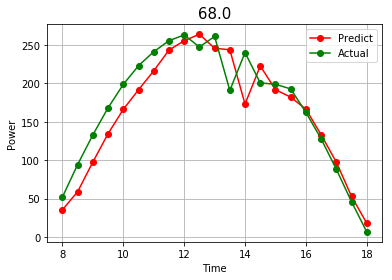

0.21775087055496808


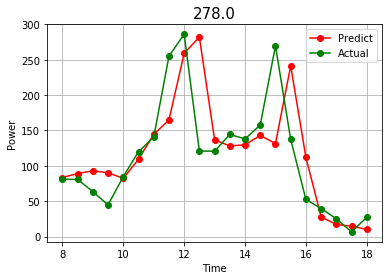

0.4208922588531821


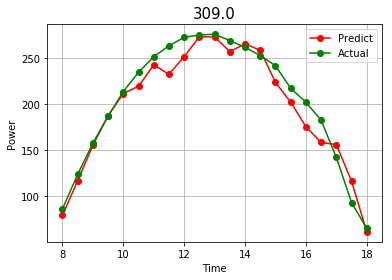

0.06513724616306049


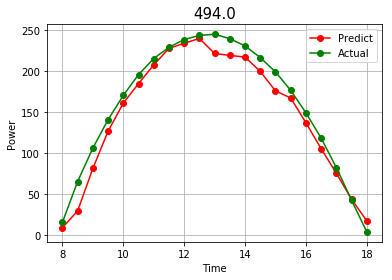

0.26851930362481835


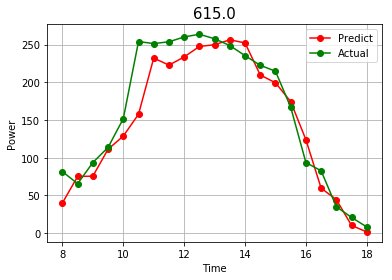

0.20304949907199615


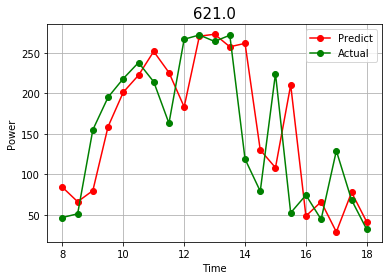

0.4897688644380952


In [62]:
import matplotlib.pyplot as plt
x = [8+i*0.5 for i in range(21)]
j = 0
for i in range(21*len(test_list)-21):
    if i%21 == 0:
        plt.plot(x,predict_power[i:i+21],'r-o',label = 'Predict')
        plt.plot(x,test_label[i:i+21],'g-o',label = 'Actual')
        plt.xlabel('Time')
        plt.ylabel('Power')
        title = test_date[j] 
        j+=1
        plt.title(title,fontsize = 15)
        plt.grid(True)
        plt.legend()
        plt.show()
        print(np.mean(mape[i:i+21]))
    else:
        continue

In [31]:
import tensorflow as tf
INPUT_NODE = 10
OUTPUT_NODE = 1
LAYER1_NODE = 160
LAYER2_NODE = 140
LAYER3_NODE = 120
LAYER4_NODE = 100
LAYER5_NODE = 90
LAYER6_NODE = 80
LAYER7_NODE = 70


LEARNING_RATE = 0.005
REGULARIZATION_RATE = 0.0000001

TRAINING_EPOCH = 251
tf.set_random_seed(1)
def inference(input_data, regularizer):
    W1 = tf.Variable(tf.truncated_normal([INPUT_NODE,LAYER1_NODE],stddev=0.05))
    b1 = tf.Variable(tf.constant(0.1,shape=[LAYER1_NODE]))
    layer1 = tf.matmul(input_data,W1)+b1
    layer1 = tf.maximum(layer1, 0.1*layer1)
    if regularizer != None:
        tf.add_to_collection('losses',regularizer(W1))
    
    W2 = tf.Variable(tf.truncated_normal([LAYER1_NODE,LAYER2_NODE],stddev=0.05))
    b2 = tf.Variable(tf.constant(0.1,shape=[LAYER2_NODE]))
    layer2 = tf.matmul(layer1,W2)+b2
    layer2 = tf.maximum(layer2, 0.1*layer2)
    if regularizer != None:
        tf.add_to_collection('losses',regularizer(W2))
    
    W3 = tf.Variable(tf.truncated_normal([LAYER2_NODE,LAYER3_NODE],stddev=0.05))
    b3 = tf.Variable(tf.constant(0.1,shape=[LAYER3_NODE]))
    layer3 = tf.matmul(layer2,W3)+b3
    layer3 = tf.maximum(layer3, 0.1*layer3)
    if regularizer != None:
        tf.add_to_collection('losses',regularizer(W3))
    
    W4 = tf.Variable(tf.truncated_normal([LAYER3_NODE,LAYER4_NODE],stddev=0.05))
    b4 = tf.Variable(tf.constant(0.1,shape=[LAYER4_NODE]))
    layer4 = tf.matmul(layer3,W4)+b4
    layer4 = tf.maximum(layer4, 0.1*layer4)
    if regularizer != None:
        tf.add_to_collection('losses',regularizer(W4))
        
        
    W5 = tf.Variable(tf.truncated_normal([LAYER4_NODE,LAYER5_NODE],stddev=0.05))
    b5 = tf.Variable(tf.constant(0.1,shape=[LAYER5_NODE]))
    layer5 = tf.matmul(layer4,W5)+b5
    layer5 = tf.maximum(layer5, 0.1*layer5)
    if regularizer != None:
        tf.add_to_collection('losses',regularizer(W5))
        
        
    W6 = tf.Variable(tf.truncated_normal([LAYER5_NODE,LAYER6_NODE],stddev=0.05))
    b6 = tf.Variable(tf.constant(0.1,shape=[LAYER6_NODE]))
    layer6 = tf.matmul(layer5,W6)+b6
    layer6 = tf.maximum(layer6, 0.1*layer6)
    if regularizer != None:
        tf.add_to_collection('losses',regularizer(W6))
        
    W7 = tf.Variable(tf.truncated_normal([LAYER6_NODE,LAYER7_NODE],stddev=0.05))
    b7 = tf.Variable(tf.constant(0.1,shape=[LAYER7_NODE]))
    layer7 = tf.matmul(layer6,W7)+b7
    layer7 = tf.maximum(layer7, 0.1*layer7)
    if regularizer != None:
        tf.add_to_collection('losses',regularizer(W6))
    
    W_o = tf.Variable(tf.truncated_normal([LAYER7_NODE,OUTPUT_NODE],stddev=0.05))
    b_o = tf.Variable(tf.constant(0.1,shape=[OUTPUT_NODE]))
    pre = tf.nn.relu(tf.matmul(layer7,W_o)+b_o)
    if regularizer != None:
        tf.add_to_collection('losses',regularizer(W_o))
        
    return pre

input_data = tf.placeholder(tf.float32,[None,INPUT_NODE])
input_label = tf.placeholder(tf.float32,[None,OUTPUT_NODE])
regularizer = tf.contrib.layers.l2_regularizer(REGULARIZATION_RATE)

pre = inference(input_data,regularizer)
test_pre = inference(input_data,None)
cost = tf.reduce_mean(tf.square(input_label - pre)) + tf.add_n(tf.get_collection('losses'))
train_step = tf.train.AdamOptimizer(LEARNING_RATE).minimize(cost)


with tf.Session() as sess:
    f = []
    for i in [1,2,3,4,5]:
        np.random.seed(i)
        test_list = np.random.randint(0,int(len(all_data)/21),size = 120)#有重复
        test_list = sorted(set(test_list))

        train_data = []
        train_label = []
        test_data = []
        test_label = []
        train_date = []
        test_date = []
        for i in range(int(len(all_data)/21)):
            for j in range(21):
                a = all_data[i*21+j]
                if i in test_list:
                    test_data.append(a[1:-1])
                    test_label.append(a[-1])
                    test_date.append(a[0])
                else:
                    train_data.append(a[1:-1])
                    train_label.append(a[-1])
                    train_date.append(a[0])
        BATCH_SIZE = len(train_data)
        tf.global_variables_initializer().run()
        start = 0
        end = start+BATCH_SIZE
        for i in range(int(TRAINING_EPOCH*len(train_data)/BATCH_SIZE)):
            xs = train_data[start:end]
            ys = train_label[start:end]
            try:
                ys = np.reshape(ys,[BATCH_SIZE,1])
            except:
                print(len(ys))
                print(len(train_data))
            _, loss = sess.run([train_step,cost],feed_dict={input_data:xs, input_label:ys})
            if end == len(train_data):
                start = 0
                end = BATCH_SIZE
            else:
                start = end
                end+=BATCH_SIZE
            if i%(50*len(train_data)/BATCH_SIZE) == 0:
                print('After %d epoch,loss value:%g'%(i/(len(train_data)/BATCH_SIZE),loss))
        print('Training Finished')

        predict_power = sess.run(pre,feed_dict={input_data:test_data})

        mape = [abs(predict_power[i]-test_label[i])/test_label[i] for i in range(21*len(test_list))]
        print('TEST MAPE:',np.mean(mape))
        f.append(np.mean(mape))
    print(np.mean(f))

After 0 epoch,loss value:36214.4
After 50 epoch,loss value:1806.92
After 100 epoch,loss value:1382.5
After 150 epoch,loss value:992.696
After 200 epoch,loss value:742.485
After 250 epoch,loss value:393.004
Training Finished
TEST MAPE: 0.5907674
After 0 epoch,loss value:30869.6
After 50 epoch,loss value:156.46
After 100 epoch,loss value:11.0769
After 150 epoch,loss value:4.12693
After 200 epoch,loss value:1.74769
After 250 epoch,loss value:0.611233
Training Finished
TEST MAPE: 0.8184512
After 0 epoch,loss value:19039.6
After 50 epoch,loss value:794.363
After 100 epoch,loss value:407.909
After 150 epoch,loss value:258.032
After 200 epoch,loss value:164.284
After 250 epoch,loss value:77.6947
Training Finished
TEST MAPE: 0.53720975
After 0 epoch,loss value:31525.7
After 50 epoch,loss value:2091.73
After 100 epoch,loss value:1449.98
After 150 epoch,loss value:993.13
After 200 epoch,loss value:395.943
After 250 epoch,loss value:621.664
Training Finished
TEST MAPE: 0.8020269
After 0 epoch,los